In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv('C:/Users/Tanuj/OneDrive/Desktop/loan_data.csv')
print(df.head())
print("\n")
df.info()
print("\n")
df.describe()

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 1.0, 'Histogram of FICO Distribution Based on Credit Policy')

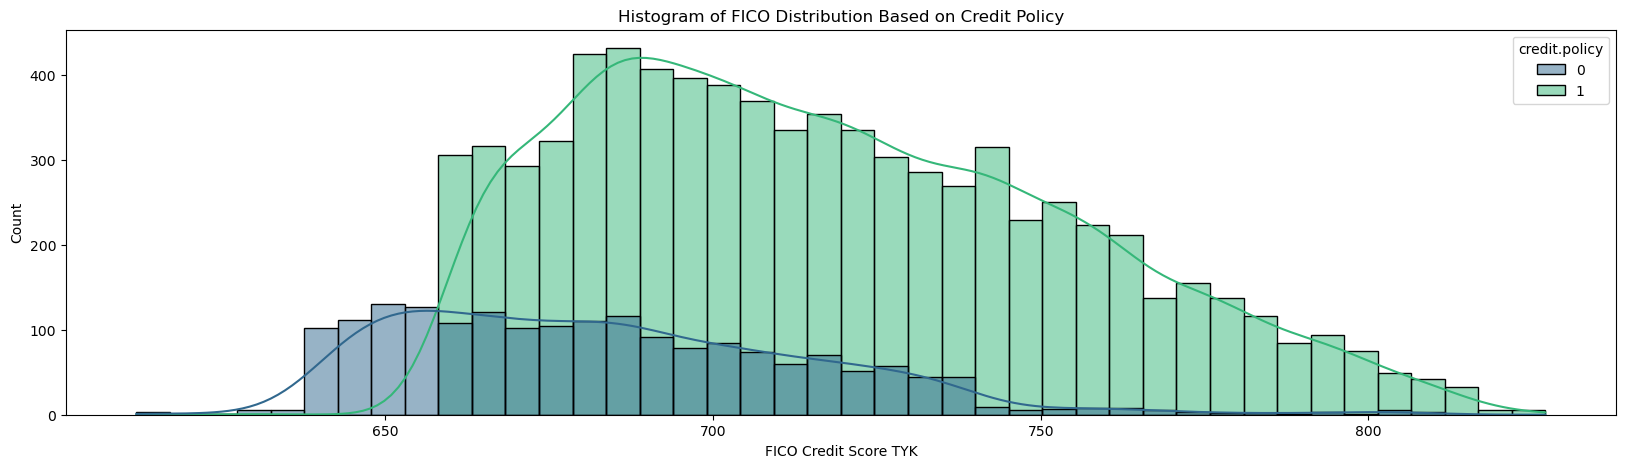

In [19]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x=df['fico'], hue='credit.policy', palette='viridis', kde=True)
plt.xlabel('FICO Credit Score TYK')
plt.tight_layout
plt.title('Histogram of FICO Distribution Based on Credit Policy')

Text(0.5, 1.0, 'Histogram of FICO Distribution Based on "not.fully.paid"')

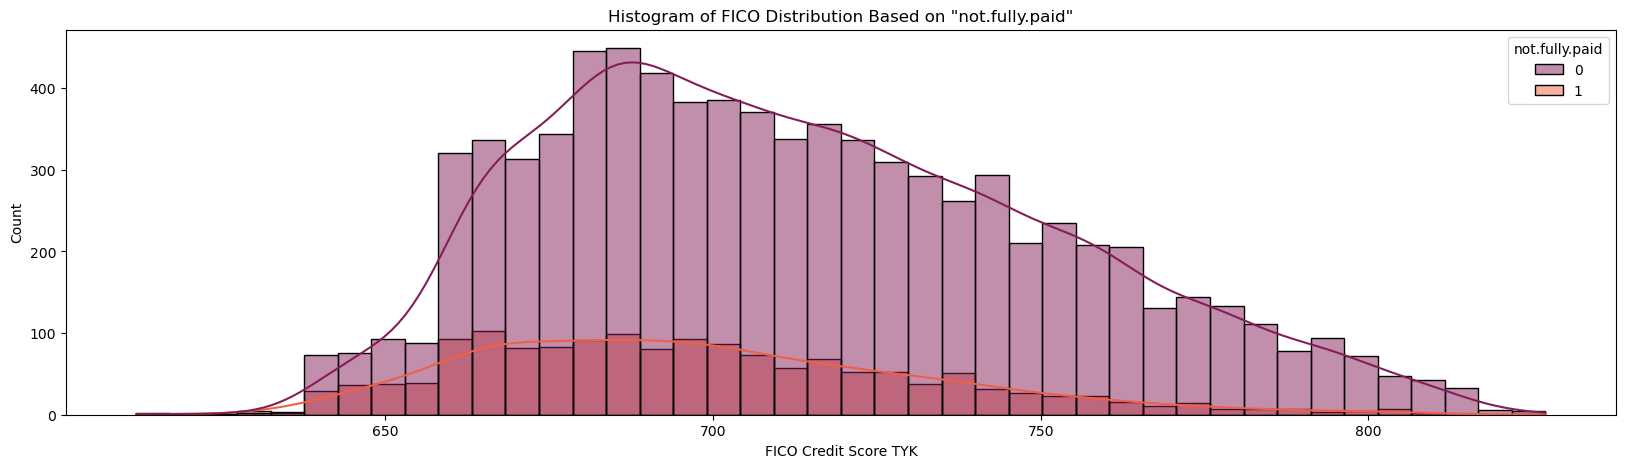

In [20]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x=df['fico'], hue='not.fully.paid', palette='rocket', kde=True)
plt.xlabel('FICO Credit Score TYK')
plt.tight_layout
plt.title('Histogram of FICO Distribution Based on "not.fully.paid"')

<AxesSubplot:xlabel='purpose', ylabel='count'>

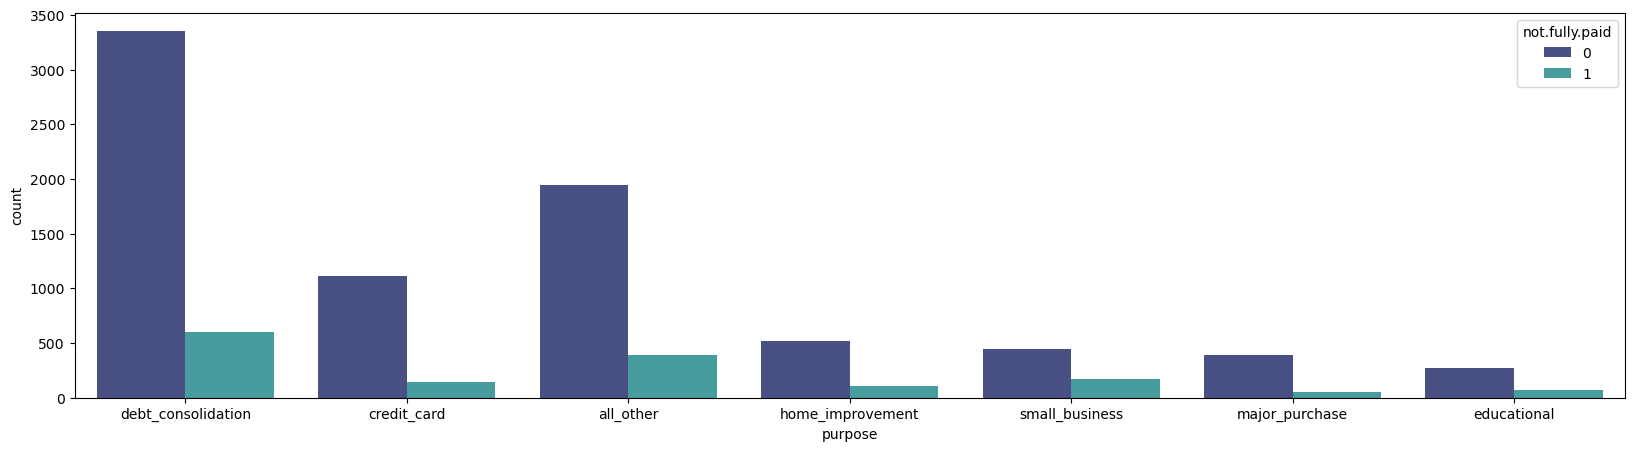

In [5]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='purpose', hue='not.fully.paid',palette='mako')

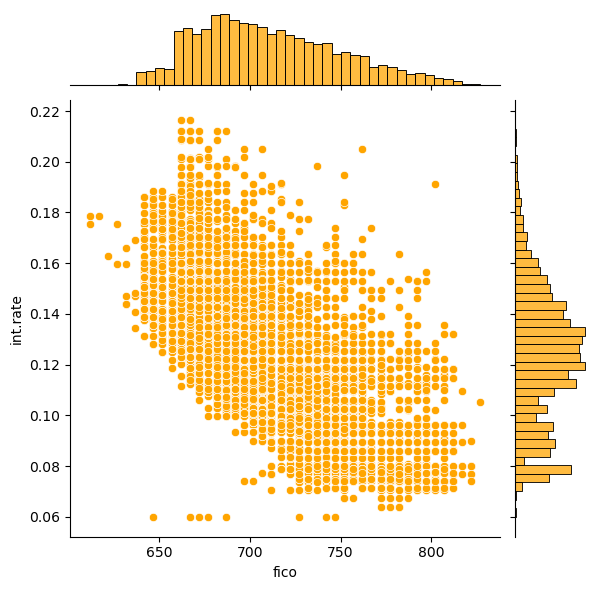

In [7]:
sns.jointplot(data=df, x='fico', y='int.rate', color='orange')

<AxesSubplot:>

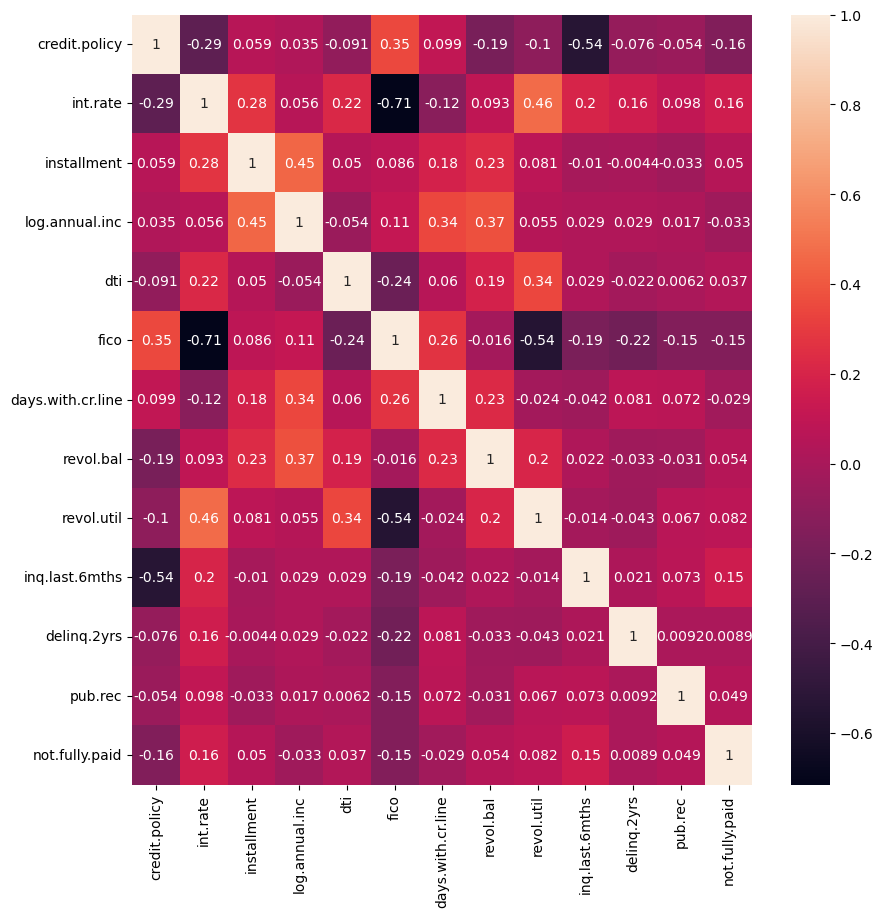

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [10]:
print(df['purpose'].value_counts())
dummies = pd.get_dummies(df['purpose'], drop_first=True)
dummies.head()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [11]:
final_df = pd.concat([df,dummies],axis=1)
final_df.drop('purpose',inplace=True, axis=1)

In [12]:
X = final_df.drop(labels='not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
predictions_dt = dt.predict(X_test)

In [15]:
print(confusion_matrix(y_test, predictions_dt))
print(classification_report(y_test, predictions_dt))

[[2209  457]
 [ 383  112]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2666
           1       0.20      0.23      0.21       495

    accuracy                           0.73      3161
   macro avg       0.52      0.53      0.53      3161
weighted avg       0.75      0.73      0.74      3161



In [16]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
predictions_rf = rf.predict(X_test)

In [18]:
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

[[2656   10]
 [ 486    9]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2666
           1       0.47      0.02      0.04       495

    accuracy                           0.84      3161
   macro avg       0.66      0.51      0.47      3161
weighted avg       0.79      0.84      0.78      3161

